# Vector Auto Regression - VAR

In [1]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests,adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
# import csv dataset
df=pd.read_csv('divvy-tripdata_cleaned.csv',index_col=1,parse_dates=True)

# make into dataframe
df2=pd.DataFrame(df)

# which columns to include alongside column acting as index
cols=[3,4,6,10,11,12,14,15]
df2=df2[df2.columns[cols]]

# sorting the dataframe
df3=df2.sort_values("start_time")
df3.head()

,trip_duration,from_station_id,to_station_id,birth_year,from_latitude,from_longitude,to_latitude,to_longitude
start_time,,,,,,,,
2013-06-30 11:04:00,1538,69,88,NaN,41.909396,-87.677692,41.883970,-87.655688
2013-06-30 11:35:00,1108,76,26,NaN,41.880958,-87.616743,41.891020,-87.617300
2013-06-30 11:55:00,2063,53,94,NaN,41.893832,-87.634195,41.918306,-87.636282
2013-06-30 12:03:00,775,36,52,NaN,41.877708,-87.635321,41.886024,-87.624117
2013-06-30 12:15:00,784,90,5,NaN,41.881032,-87.624084,41.874053,-87.627716


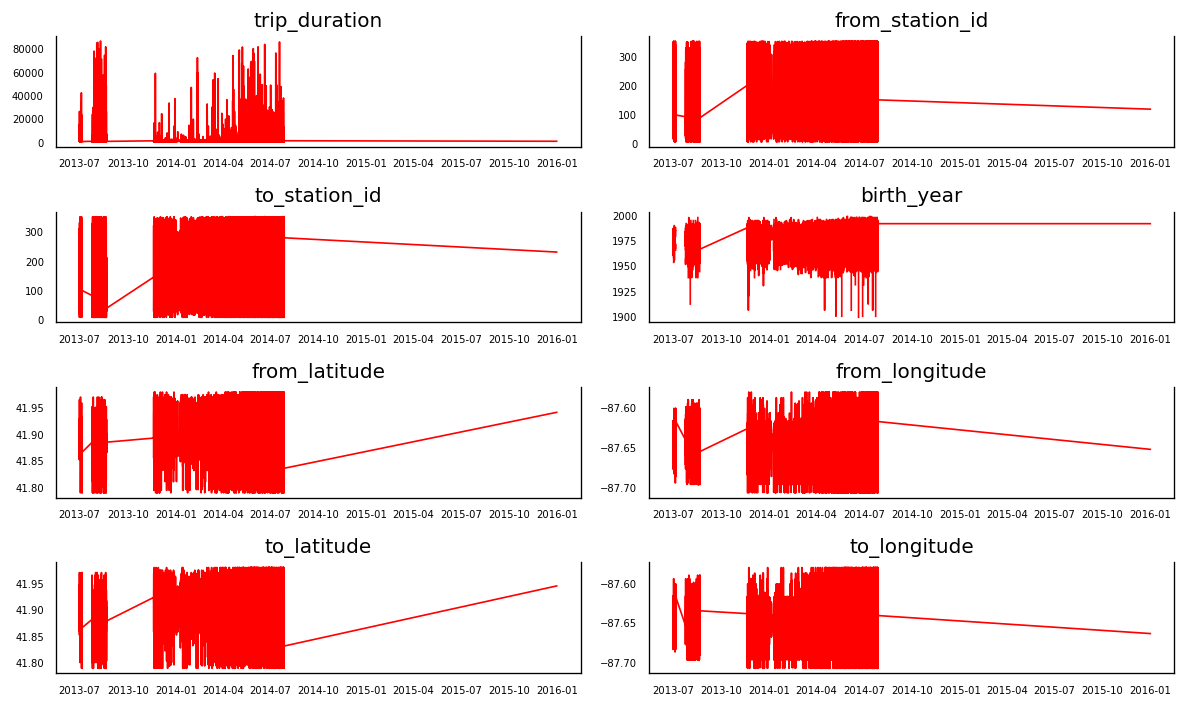

In [4]:
fig,axes=plt.subplots(nrows=4,ncols=2,dpi=120,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
    data=df3[df3.columns[i]]
    ax.plot(data,color='red',linewidth=1)
    # decorations
    ax.set_title(df3.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    
plt.tight_layout()

In [5]:
ad_fuller_result_1=adfuller(df3['trip_duration'])

print('trip duration')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n-------------------\n')

ad_fuller_result_2=adfuller(df3['from_station_id'])

print('from station id')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n-------------------\n')

ad_fuller_result_3=adfuller(df3['to_station_id'])

print('to station id')
print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')

print('\n-------------------\n')

ad_fuller_result_4=adfuller(df3['from_latitude'])

print('from latitude')
print(f'ADF Statistic: {ad_fuller_result_4[0]}')
print(f'p-value: {ad_fuller_result_4[1]}')

print('\n-------------------\n')

ad_fuller_result_5=adfuller(df3['from_longitude'])

print('from longitude')
print(f'ADF Statistic: {ad_fuller_result_5[0]}')
print(f'p-value: {ad_fuller_result_5[1]}')

print('\n-------------------\n')

ad_fuller_result_6=adfuller(df3['to_latitude'])

print('to latitude')
print(f'ADF Statistic: {ad_fuller_result_6[0]}')
print(f'p-value: {ad_fuller_result_6[1]}')

print('\n-------------------\n')

ad_fuller_result_7=adfuller(df3['to_longitude'])

print('to longitude')
print(f'ADF Statistic: {ad_fuller_result_7[0]}')
print(f'p-value: {ad_fuller_result_7[1]}')

trip duration
ADF Statistic: -22.42879852119242
p-value: 0.0

-------------------

from station id
ADF Statistic: -17.12669891596911
p-value: 7.195473553588861e-30

-------------------

to station id
ADF Statistic: -17.237989651219483
p-value: 6.132886757974755e-30

-------------------

from latitude
ADF Statistic: -22.558062833641646
p-value: 0.0

-------------------

from longitude
ADF Statistic: -24.52111519052165
p-value: 0.0

-------------------

to latitude
ADF Statistic: -23.836575021686667
p-value: 0.0

-------------------

to longitude
ADF Statistic: -26.000107219086264
p-value: 0.0


In [6]:
# if the p-value is greater than 0.05, then the data corresponding to that
# particular column is not stationary
# in that case, we need to convert the non-stationary data to stationary data
# by differentiating suitable number of times until we get stationary data

In [7]:
# does from station id cause trip duration
print('from station id cause trip duration?\n')
print('-------------------')
granger_1=grangercausalitytests(df3[['trip_duration','from_station_id']],4)

# does to station id cause trip duration
print('to station id cause trip duration?\n')
print('-------------------')
granger_2=grangercausalitytests(df3[['trip_duration','to_station_id']],4)

from station id cause trip duration?

-------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8872  , p=0.0487  , df_denom=75996, df_num=1
ssr based chi2 test:   chi2=3.8874  , p=0.0487  , df=1
likelihood ratio test: chi2=3.8873  , p=0.0487  , df=1
parameter F test:         F=3.8872  , p=0.0487  , df_denom=75996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6184  , p=0.0268  , df_denom=75993, df_num=2
ssr based chi2 test:   chi2=7.2373  , p=0.0268  , df=2
likelihood ratio test: chi2=7.2370  , p=0.0268  , df=2
parameter F test:         F=3.6184  , p=0.0268  , df_denom=75993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.3910  , p=0.0003  , df_denom=75990, df_num=3
ssr based chi2 test:   chi2=19.1746 , p=0.0003  , df=3
likelihood ratio test: chi2=19.1722 , p=0.0003  , df=3
parameter F test:         F=6.3910  , p=0.0003  , df_denom=75990, df_num=3

Granger Causality
numbe

In [8]:
# if p-value is less than 0.05, then that means the hypothesis is true
# we can conclude that: from station id causes trip duration
# we can conclude that: to station id causes trip duration

In [9]:
df4=df3[['trip_duration','from_station_id','to_station_id','from_latitude','from_longitude','to_latitude','to_longitude']]
print(df4.shape)

(76000, 7)


In [10]:
train_df=df4[:-500]
test_df=df4[-500:]

In [11]:
print(test_df.shape)

(500, 7)


In [12]:
model=VAR(train_df.diff()[1:])

In [13]:
sorted_order=model.select_order(maxlags=100)
print(sorted_order.summary())

  VAR Order Selection (* highlights the minimums)  
        AIC         BIC         FPE         HQIC   
---------------------------------------------------
0         6.277       6.278       532.2       6.277
1         4.294       4.301       73.28       4.296
2         3.478       3.491       32.41       3.482
3         3.032       3.051       20.73       3.038
4         2.760       2.785       15.81       2.768
5         2.572       2.602       13.09       2.581
6         2.433       2.470       11.39       2.444
7         2.320       2.363       10.18       2.334
8         2.238       2.287       9.378       2.253
9         2.171       2.226       8.765       2.188
10        2.112       2.173       8.268       2.131
11        2.064       2.131       7.880       2.085
12        2.024       2.097       7.567       2.046
13        1.992       2.071       7.330       2.016
14        1.962       2.047       7.114       1.988
15        1.936       2.027       6.933       1.964
16        1.

In [14]:
# gives some scores like AIC, BIC, FPE, HQIC scores
# for a model to be good, these scores must be as low as possible
# for each of the scores, the min lag values found are highlighted by *

In [ ]:
var_model=VARMAX(train_df,order=(4,0),enforce_stationarity=True)
fitted_model=var_model.fit(disp=False)
print(fitted_model.summary())

In [ ]:
# the advantage of using the VARMAX class is that
# it makes forecasting very easy
# we are using only the auto regression part 
# and not using the moving average part
# hence the moving average part is assigned 0
# whereas the auto regression part is set to 4 time lags

In [ ]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean

In [ ]:
predictions.columns=['trip_duration_predicted','from_station_id_predicted','to_station_id_predicted','from_latitude_predicted','from_longitude_predicted','to_latitude_predicted','to_longitude_predicted']
predictions

In [ ]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

In [ ]:
test_vs_pred.plot(figsize=(12,5))

In [ ]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_trip_duration=math.sqrt(mean_squared_error(predictions['trip_duration_predicted'],test_df['trip_duration']))
print('Mean value of trip duration is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['trip_duration']),rmse_trip_duration))

rmse_from_station_id=math.sqrt(mean_squared_error(predictions['from_station_id_predicted'],test_df['from_station_id']))
print('Mean value of from station id is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['from_station_id']),rmse_from_station_id))

rmse_to_station_id=math.sqrt(mean_squared_error(predictions['to_station_id_predicted'],test_df['to_station_id']))
print('Mean value of to station id is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['to_station_id']),rmse_to_station_id))

rmse_from_latitude=math.sqrt(mean_squared_error(predictions['from_latitude_predicted'],test_df['from_latitude']))
print('Mean value of from latitude is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['from_latitude']),rmse_from_latitude))

rmse_from_longitude=math.sqrt(mean_squared_error(predictions['from_longitude_predicted'],test_df['from_longitude']))
print('Mean value of from longitude is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['from_longitude']),rmse_from_longitude))

rmse_to_latitude=math.sqrt(mean_squared_error(predictions['to_latitude_predicted'],test_df['to_latitude']))
print('Mean value of to latitude is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['to_latitude']),rmse_to_latitude))

rmse_to_longitude=math.sqrt(mean_squared_error(predictions['to_longitude_predicted'],test_df['to_longitude']))
print('Mean value of to longitude is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['to_longitude']),rmse_to_longitude))